In [1]:
import pandas as pd               # For data manipulation and analysis
import numpy as np                # For numerical operations, especially with arrays
import matplotlib.pyplot as plt   # For basic plotting and visualization
import seaborn as sns             # For enhanced statistical data visualization

In [2]:
# --- Scikit-learn (Machine Learning) Libraries ---
from sklearn.model_selection import train_test_split # To split data into training and testing sets
from sklearn.preprocessing import StandardScaler     # To standardize (scale) features like 'Amount'

# --- Models ---
from sklearn.linear_model import LogisticRegression    # A baseline classification model
from sklearn.ensemble import RandomForestClassifier  # A robust tree-based model

# --- Metrics and Imbalance Handling ---
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_curve
from imblearn.over_sampling import SMOTE             # For Synthetic Minority Over-sampling Technique (handling imbalance)


In [3]:
try:
    data = pd.read_csv('/content/creditcard.csv', sep=',', engine='python', on_bad_lines='skip')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'creditcard.csv' not found. Please ensure the file is in your working directory.")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

Dataset loaded successfully!


In [4]:
# Initial Data Inspection Codes

In [5]:
# 1. Display the first few rows (a quick look at the data structure)
print("--- 1. First 5 Rows ---")
print(data.head())

--- 1. First 5 Rows ---
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        

In [6]:
# 2. Display the last few rows
print(data.tail())

         Time        V1        V2        V3        V4        V5        V6  \
150627  93789 -0.487808  0.524641 -1.976990  0.215200  1.706376 -2.220200   
150628  93790 -4.948835  4.463739 -4.315625 -0.876520 -2.068503 -0.587427   
150629  93798  1.963076  0.761481 -0.695665  3.900855  0.564233 -0.388571   
150630  93798  0.000511  1.064202 -0.403154 -0.629699  1.218252 -0.233102   
150631  93798 -0.796099  0.855510 -1.547924  0.276334  0.257263 -1.366656   

              V7        V8        V9  ...       V21       V22       V23  \
150627  1.011071 -0.252453  0.716540  ...  0.488790  1.615337 -0.031607   
150628 -2.512790  3.852223  1.211863  ... -0.302062 -1.216998  0.431651   
150629  0.243059 -0.305132  0.169108  ...  0.067740  0.454708  0.056026   
150630  0.870353 -0.143075  1.567454  ... -0.569978 -1.103569  0.041873   
150631  0.124734       NaN       NaN  ...       NaN       NaN       NaN   

             V24       V25       V26       V27       V28  Amount  Class  
150627  0.03

In [7]:
# 3. Check the data types, non-null counts, and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150632 entries, 0 to 150631
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    150632 non-null  int64  
 1   V1      150632 non-null  float64
 2   V2      150632 non-null  float64
 3   V3      150632 non-null  float64
 4   V4      150632 non-null  float64
 5   V5      150632 non-null  float64
 6   V6      150632 non-null  float64
 7   V7      150632 non-null  float64
 8   V8      150631 non-null  float64
 9   V9      150631 non-null  float64
 10  V10     150631 non-null  float64
 11  V11     150631 non-null  float64
 12  V12     150631 non-null  float64
 13  V13     150631 non-null  float64
 14  V14     150631 non-null  float64
 15  V15     150631 non-null  float64
 16  V16     150631 non-null  float64
 17  V17     150631 non-null  float64
 18  V18     150631 non-null  float64
 19  V19     150631 non-null  float64
 20  V20     150631 non-null  float64
 21  V21     15

In [8]:
# 4. Get descriptive statistics for numerical columns

print(data.describe())

                Time             V1             V2             V3  \
count  150632.000000  150632.000000  150632.000000  150632.000000   
mean    54357.441281      -0.241951       0.039563       0.626443   
std     22079.490779       1.820806       1.612470       1.290487   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     39052.000000      -1.024734      -0.545888       0.121639   
50%     55999.000000      -0.268150       0.117763       0.719971   
75%     72876.000000       1.161285       0.801699       1.345372   
max     93798.000000       2.401777      18.902453       9.382558   

                  V4             V5             V6             V7  \
count  150632.000000  150632.000000  150632.000000  150632.000000   
mean        0.129322      -0.249922       0.071603      -0.103569   
std         1.341313       1.313190       1.288432       1.165148   
min        -5.519697     -42.147898     -26.160506     -31.764946   
25%        -0.727396      -0.8838

In [9]:
# 5. Check for explicit missing (NaN) values

print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [10]:
data.isnull().sum().max()

1

Exploratory Data Analysis (EDA) & Imbalance Analysis

Analyze and Visualize Class Distribution


In [11]:
# 1. Calculate the counts of each class (0: Valid, 1: Fraud)
class_counts = data['Class'].value_counts()
print(class_counts)

Class
0.0    150337
1.0       294
Name: count, dtype: int64


In [12]:
# Calculate the percentage of fraud
fraud_count = data['Class'].value_counts()[1]
total_count = len(data)
fraud_percentage = (fraud_count / total_count) * 100
print(f"Total Transactions: {total_count}")
print(f"Fraud Transactions: {fraud_count}")
print(f"Percentage of Fraud: {fraud_percentage:.3f}%")



Total Transactions: 150632
Fraud Transactions: 294
Percentage of Fraud: 0.195%


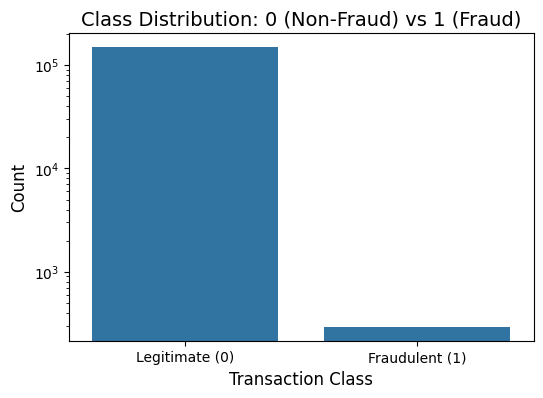

In [13]:
## Visualize the Imbalance
# A bar plot is the most direct way to visualize the stark difference between the classes.
# Create a bar plot for the class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution: 0 (Non-Fraud) vs 1 (Fraud)', fontsize=14)
plt.xlabel('Transaction Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Legitimate (0)', 'Fraudulent (1)'])
plt.yscale('log') # Use a log scale to make the Fraud bar visible
plt.show()


In [14]:
## Examine Feature Distributions ('Time' and 'Amount')
# Now let's look at the only two non-PCA features to see if they hold any direct patterns related to fraud.
# Action 1: Scaling 'Time' and 'Amount'
# We need to scale 'Amount' and 'Time' to make their distributions comparable and useful for algorithms that rely on distance metrics.

from sklearn.preprocessing import StandardScaler


In [15]:
# Create copies of the features for scaling
data['scaled_amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data['scaled_time'] = StandardScaler().fit_transform(data['Time'].values.reshape(-1, 1))


In [16]:
# Drop the original 'Time' and 'Amount' columns as we will use the scaled versions
data.drop(['Time', 'Amount'], axis=1, inplace=True)


In [17]:
# Reorder columns to place 'Class' at the end for consistency (optional)
scaled_data = data[['scaled_time', 'scaled_amount'] + list(data.columns[:-2]) + ['Class']]
print(scaled_data.head())



   scaled_time  scaled_amount        V1        V2        V3        V4  \
0    -2.461906       0.249074 -1.359807 -0.072781  2.536347  1.378155   
1    -2.461906      -0.355850  1.191857  0.266151  0.166480  0.448154   
2    -2.461860       1.192054 -1.358354 -1.340163  1.773209  0.379780   
3    -2.461860       0.141536 -0.966272 -0.185226  1.792993 -0.863291   
4    -2.461815      -0.078770 -1.158233  0.877737  1.548718  0.403034   

         V5        V6        V7        V8  ...       V21       V22       V23  \
0 -0.338321  0.462388  0.239599  0.098698  ... -0.018307  0.277838 -0.110474   
1  0.060018 -0.082361 -0.078803  0.085102  ... -0.225775 -0.638672  0.101288   
2 -0.503198  1.800499  0.791461  0.247676  ...  0.247998  0.771679  0.909412   
3 -0.010309  1.247203  0.237609  0.377436  ... -0.108300  0.005274 -0.190321   
4 -0.407193  0.095921  0.592941 -0.270533  ... -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28  Class  Class  
0  0.066928 

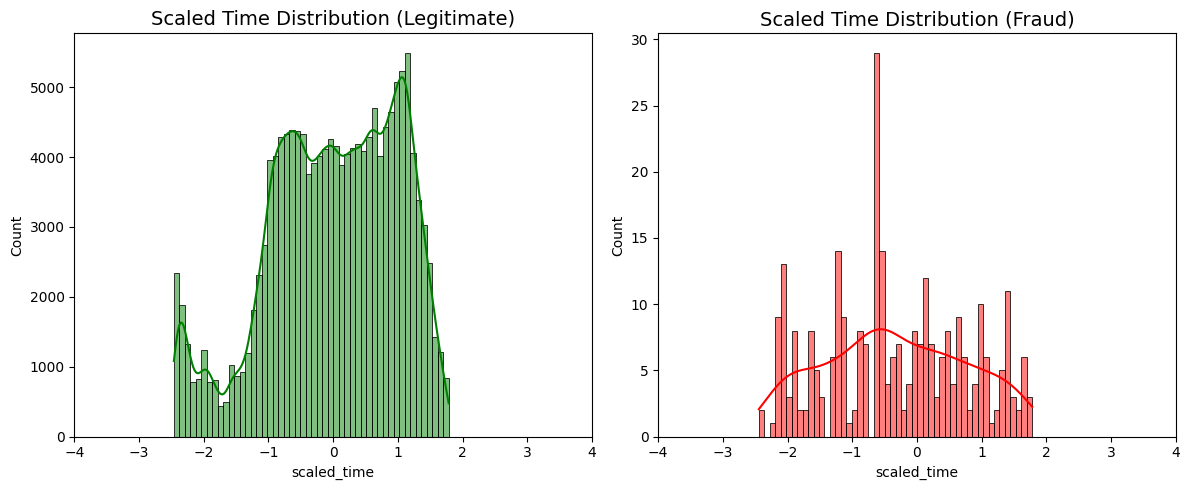

In [18]:
## Visualize 'Time' of Fraud
# Let's see the distribution of transaction time across the two classes.

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Distribution of 'Time' for Legitimate Transactions
sns.histplot(data[data['Class'] == 0]['scaled_time'], bins=50, ax=ax1, color='green', kde=True)
ax1.set_title('Scaled Time Distribution (Legitimate)', fontsize=14)
ax1.set_xlim([-4, 4])

# Distribution of 'Time' for Fraudulent Transactions
sns.histplot(data[data['Class'] == 1]['scaled_time'], bins=50, ax=ax2, color='red', kde=True)
ax2.set_title('Scaled Time Distribution (Fraud)', fontsize=14)
ax2.set_xlim([-4, 4])

plt.tight_layout()
plt.show()


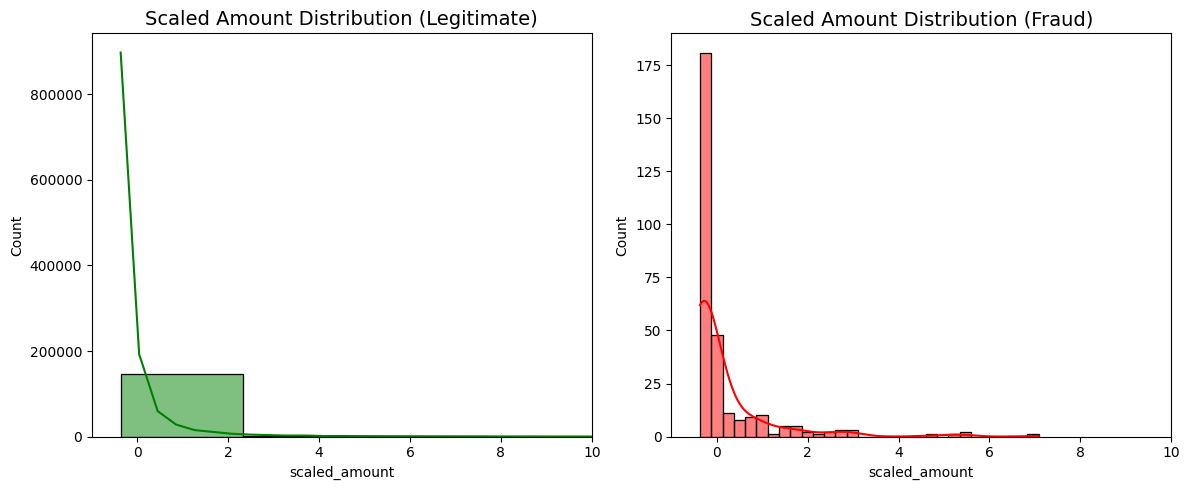

In [19]:
## Visualize 'Amount' of Fraud

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Distribution of 'Amount' for Legitimate Transactions
sns.histplot(data[data['Class'] == 0]['scaled_amount'], bins=30, ax=ax1, color='green', kde=True)
ax1.set_title('Scaled Amount Distribution (Legitimate)', fontsize=14)
ax1.set_xlim([-1, 10]) # Focus on the lower range where most data is

# Distribution of 'Amount' for Fraudulent Transactions
sns.histplot(data[data['Class'] == 1]['scaled_amount'], bins=30, ax=ax2, color='red', kde=True)
ax2.set_title('Scaled Amount Distribution (Fraud)', fontsize=14)
ax2.set_xlim([-1, 10])

plt.tight_layout()
plt.show()


Data Preprocessing and Imbalance Handling



In [20]:
## Define Features (X) and Target (y)
# First, let's separate your features (the scaled data columns) from the target variable (Class).
# Define features (X) and target (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Drop rows where 'Class' (y) is NaN
# This ensures X and y are aligned and have no missing target values
valid_indices = y.dropna().index
X = X.loc[valid_indices]
y = y.loc[valid_indices]

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X shape: (150631, 30)
y shape: (150631,)


In [21]:
from sklearn.model_selection import train_test_split

# Split into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Stratify=y ensures that both the training and testing sets have the same proportion of fraud cases
print("--- Data Split Summary ---")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Fraud cases in y_train: {y_train.sum()} ({y_train.sum() / len(y_train) * 100:.3f}%)")
print(f"Fraud cases in y_test: {y_test.sum()} ({y_test.sum() / len(y_test) * 100:.3f}%)")

--- Data Split Summary ---
X_train shape: (120504, 30)
X_test shape: (30127, 30)
Fraud cases in y_train: 235.0 (0.195%)
Fraud cases in y_test: 59.0 (0.196%)


In [22]:
# Handle Imbalance with SMOTE (Oversampling)
from imblearn.over_sampling import SMOTE
from collections import Counter

# Show the class distribution BEFORE SMOTE
print("Class distribution BEFORE SMOTE:", Counter(y_train))

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Show the class distribution AFTER SMOTE
print("Class distribution AFTER SMOTE:", Counter(y_train_res))

# Now we have a balanced training set for our supervised models!

Class distribution BEFORE SMOTE: Counter({0.0: 120269, 1.0: 235})
Class distribution AFTER SMOTE: Counter({0.0: 120269, 1.0: 120269})


In [23]:
## Establish an Unsupervised Baseline (Isolation Forest)
from sklearn.ensemble import IsolationForest

# Train Isolation Forest on the original, unresampled training data
# contamination='auto' estimates the proportion of outliers in the data
iso_forest = IsolationForest(contamination=fraud_percentage / 100, random_state=42)
iso_forest.fit(X_train)

# Predict on the TEST set
# Isolation Forest predicts -1 for an outlier (fraud) and 1 for an inlier (legit)
y_pred_iso = iso_forest.predict(X_test)

# Convert -1 (Outlier) to 1 (Fraud) and 1 (Inlier) to 0 (Legit) for standard evaluation
y_pred_iso[y_pred_iso == 1] = 0  # Legitimate
y_pred_iso[y_pred_iso == -1] = 1 # Fraud

# We will evaluate this model in the next milestone!
print("Isolation Forest trained and ready for evaluation.")

Isolation Forest trained and ready for evaluation.


In [24]:
## Model Training and Selection
# Helper Function for Evaluation
from sklearn.metrics import confusion_matrix, classification_report, average_precision_score

def evaluate_model(y_true, y_pred, model_name):
    """Prints key classification metrics and AUPRC."""

    # Calculate the Area Under the Precision-Recall Curve (AUPRC)
    # Note: For this, we often need probabilities, but for now, we use the hard prediction for simplicity
    # If the model supports predict_proba, use it for a more accurate AUPRC.

    print(f"--- Evaluation for: {model_name} ---")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    # Calculate and display Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Fraud (0)', 'Fraud (1)'],
                yticklabels=['Non-Fraud (0)', 'Fraud (1)'])
    plt.title(f'Confusion Matrix: {model_name}', fontsize=12)
    plt.ylabel('True Class', fontsize=10)
    plt.xlabel('Predicted Class', fontsize=10)
    plt.show()


    # Focus on the fraud class (1) metrics:
    report = classification_report(y_true, y_pred, output_dict=True)
    recall_fraud = report['1.0']['recall'] # Changed '1' to '1.0'
    precision_fraud = report['1.0']['precision'] # Changed '1' to '1.0'
    f1_fraud = report['1.0']['f1-score'] # Changed '1' to '1.0'

    print(f"Key Fraud (Class 1) Metrics:")
    print(f"  Recall: {recall_fraud:.4f} (Ability to catch fraud)")
    print(f"  Precision: {precision_fraud:.4f} (Rate of false alarms)")
    print(f"  F1-Score: {f1_fraud:.4f} (Balance)")

In [25]:
# Evaluate Unsupervised Baseline (Isolation Forest)

--- Evaluation for: Isolation Forest (Baseline) ---

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     30068
         1.0       0.25      0.27      0.26        59

    accuracy                           1.00     30127
   macro avg       0.62      0.63      0.63     30127
weighted avg       1.00      1.00      1.00     30127



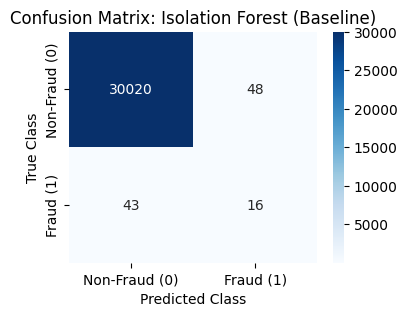

Key Fraud (Class 1) Metrics:
  Recall: 0.2712 (Ability to catch fraud)
  Precision: 0.2500 (Rate of false alarms)
  F1-Score: 0.2602 (Balance)


In [26]:

evaluate_model(y_test, y_pred_iso, "Isolation Forest (Baseline)")

Training Random Forest...
Random Forest Training Complete.
--- Evaluation for: Random Forest (SMOTE) ---

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     30068
         1.0       0.90      0.78      0.84        59

    accuracy                           1.00     30127
   macro avg       0.95      0.89      0.92     30127
weighted avg       1.00      1.00      1.00     30127



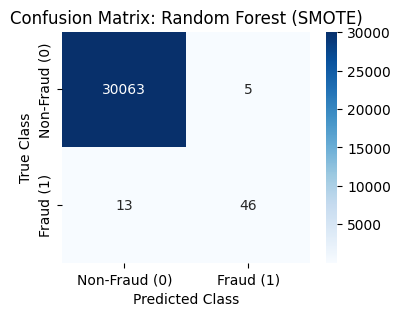

Key Fraud (Class 1) Metrics:
  Recall: 0.7797 (Ability to catch fraud)
  Precision: 0.9020 (Rate of false alarms)
  F1-Score: 0.8364 (Balance)


In [27]:
# Train and Evaluate Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
print("Training Random Forest...")
rf_model.fit(X_train_res, y_train_res)
print("Random Forest Training Complete.")

# Predict on the unseen test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
evaluate_model(y_test, y_pred_rf, "Random Forest (SMOTE)")

Refinement, Feature Importance, and Conclusion


In [29]:
# Hyperparameter Tuning (Focusing on the Best Model)

Starting Hyperparameter Tuning for XGBoost...
Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:11:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Final Tuned XGBoost Model Evaluation ---
--- Evaluation for: Tuned XGBoost (Final Model) ---

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     30068
         1.0       0.67      0.83      0.74        59

    accuracy                           1.00     30127
   macro avg       0.84      0.91      0.87     30127
weighted avg       1.00      1.00      1.00     30127



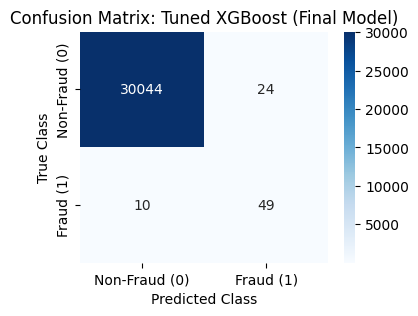

Key Fraud (Class 1) Metrics:
  Recall: 0.8305 (Ability to catch fraud)
  Precision: 0.6712 (Rate of false alarms)
  F1-Score: 0.7424 (Balance)


In [30]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import xgboost as xgb

# 1. Select the best model (e.g., XGBoost)
xgb_model_tuned = xgb.XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1,
    random_state=42
)

# 2. Define the parameter grid to search
param_dist = {
    'n_estimators': randint(100, 1000),       # Number of boosting rounds
    'learning_rate': uniform(0.01, 0.3),      # Step size shrinkage
    'max_depth': randint(3, 10),              # Maximum depth of a tree
    'subsample': uniform(0.6, 0.4),           # Subsample ratio of the training instance
    'colsample_bytree': uniform(0.6, 0.4),    # Subsample ratio of columns when constructing each tree
    'gamma': uniform(0, 5)                    # Minimum loss reduction required to make a further partition
}

# 3. Initialize Randomized Search
# Scoring: We use 'recall' as the scoring metric because catching fraud (True Positive Rate) is paramount.
rand_search = RandomizedSearchCV(
    xgb_model_tuned,
    param_distributions=param_dist,
    n_iter=50,  # Number of different parameter combinations to try
    scoring='recall',
    cv=3,       # 3-fold cross-validation
    verbose=1,
    n_jobs=-1,
    random_state=42
)

print("Starting Hyperparameter Tuning for XGBoost...")
rand_search.fit(X_train_res, y_train_res) # Fit on the SMOTE-balanced data

# 4. Get the best model
best_xgb_model = rand_search.best_estimator_

# 5. Evaluate the best model on the unseen test set
y_pred_tuned = best_xgb_model.predict(X_test)
print("\n--- Final Tuned XGBoost Model Evaluation ---")
evaluate_model(y_test, y_pred_tuned, "Tuned XGBoost (Final Model)")

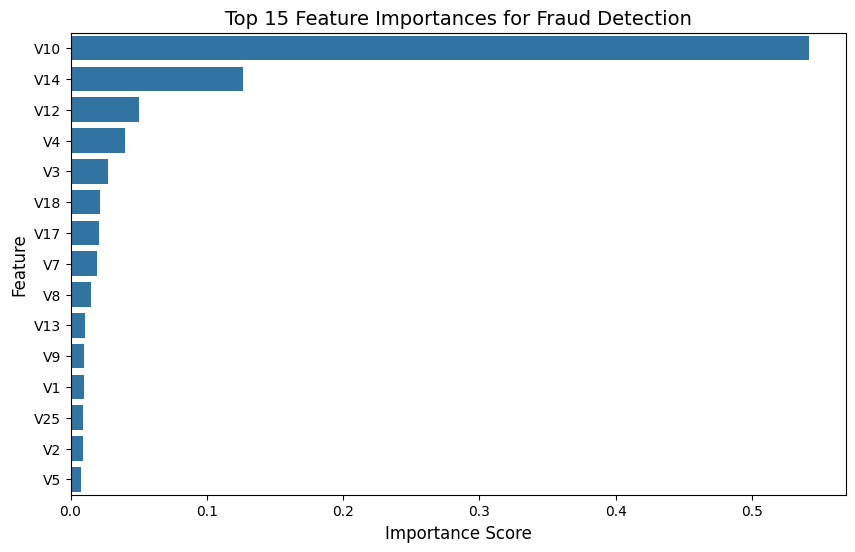


--- Top 5 Most Important Features ---
V10    0.541481
V14    0.126258
V12    0.049988
V4     0.040257
V3     0.027359
dtype: float32


In [31]:
# Analyze Feature Importance
# Get feature importance from the best model
feature_importances = best_xgb_model.feature_importances_
feature_names = X.columns

# Create a Series for easy sorting and visualization
importance_df = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)

# Visualize the top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df.head(15).values, y=importance_df.head(15).index)
plt.title('Top 15 Feature Importances for Fraud Detection', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()


# Report the top 5
print("\n--- Top 5 Most Important Features ---")
print(importance_df.head(5))